## **Importing the required libraries**


In [ ]:
# Surpressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


### Importing the <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv">Weather Dataset</a>


In [ ]:
file_path = '/content/Weather_Data.csv'
df = pd.read_csv(file_path)

df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3271 non-null   object 
 1   MinTemp           3271 non-null   float64
 2   MaxTemp           3271 non-null   float64
 3   Rainfall          3271 non-null   float64
 4   Evaporation       3271 non-null   float64
 5   Sunshine          3271 non-null   float64
 6   WindGustDir       3271 non-null   object 
 7   WindGustSpeed     3271 non-null   int64  
 8   WindDir9am        3271 non-null   object 
 9   WindDir3pm        3271 non-null   object 
 10  WindSpeed9am      3271 non-null   int64  
 11  WindSpeed3pm      3271 non-null   int64  
 12  Humidity9am       3271 non-null   int64  
 13  Humidity3pm       3271 non-null   int64  
 14  Pressure9am       3271 non-null   float64
 15  Pressure3pm       3271 non-null   float64
 16  Cloud9am          3271 non-null   int64  


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


Describing the data

In [ ]:
df.dtypes

,0
Date,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,int64
WindDir9am,object
WindDir3pm,object


In [ ]:
#the code ensures that if there is a 'Date' column in the DataFrame, its values will be converted to datetime objects, with any unconvertible values set to NaT.
# This is useful for ensuring consistent datetime formatting and handling
# invalid date entries.
if 'Date' in df.columns:
      df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])

In [ ]:
df_numeric = df_numeric.dropna()

In [ ]:
df_corr = df_numeric.corr()

In [ ]:
print(df_corr)

                   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.000000  0.771005  0.013995     0.569316 -0.063475   
MaxTemp           0.771005  1.000000 -0.139306     0.510334  0.327422   
Rainfall          0.013995 -0.139306  1.000000    -0.110343 -0.308962   
Evaporation       0.569316  0.510334 -0.110343     1.000000  0.175932   
Sunshine         -0.063475  0.327422 -0.308962     0.175932  1.000000   
WindGustSpeed     0.127792  0.073184  0.149811     0.245426 -0.029032   
WindSpeed9am     -0.298040 -0.349382  0.153696    -0.077532 -0.058410   
WindSpeed3pm      0.225905  0.155542  0.039415     0.292469  0.177813   
Humidity9am       0.053946 -0.185382  0.332636    -0.395651 -0.490631   
Humidity3pm       0.273269 -0.150741  0.305635    -0.102295 -0.586476   
Pressure9am      -0.391654 -0.385853 -0.037561    -0.343581 -0.047789   
Pressure3pm      -0.353334 -0.420375  0.001780    -0.298303 -0.094507   
Cloud9am          0.241248 -0.084695  0.245231    -

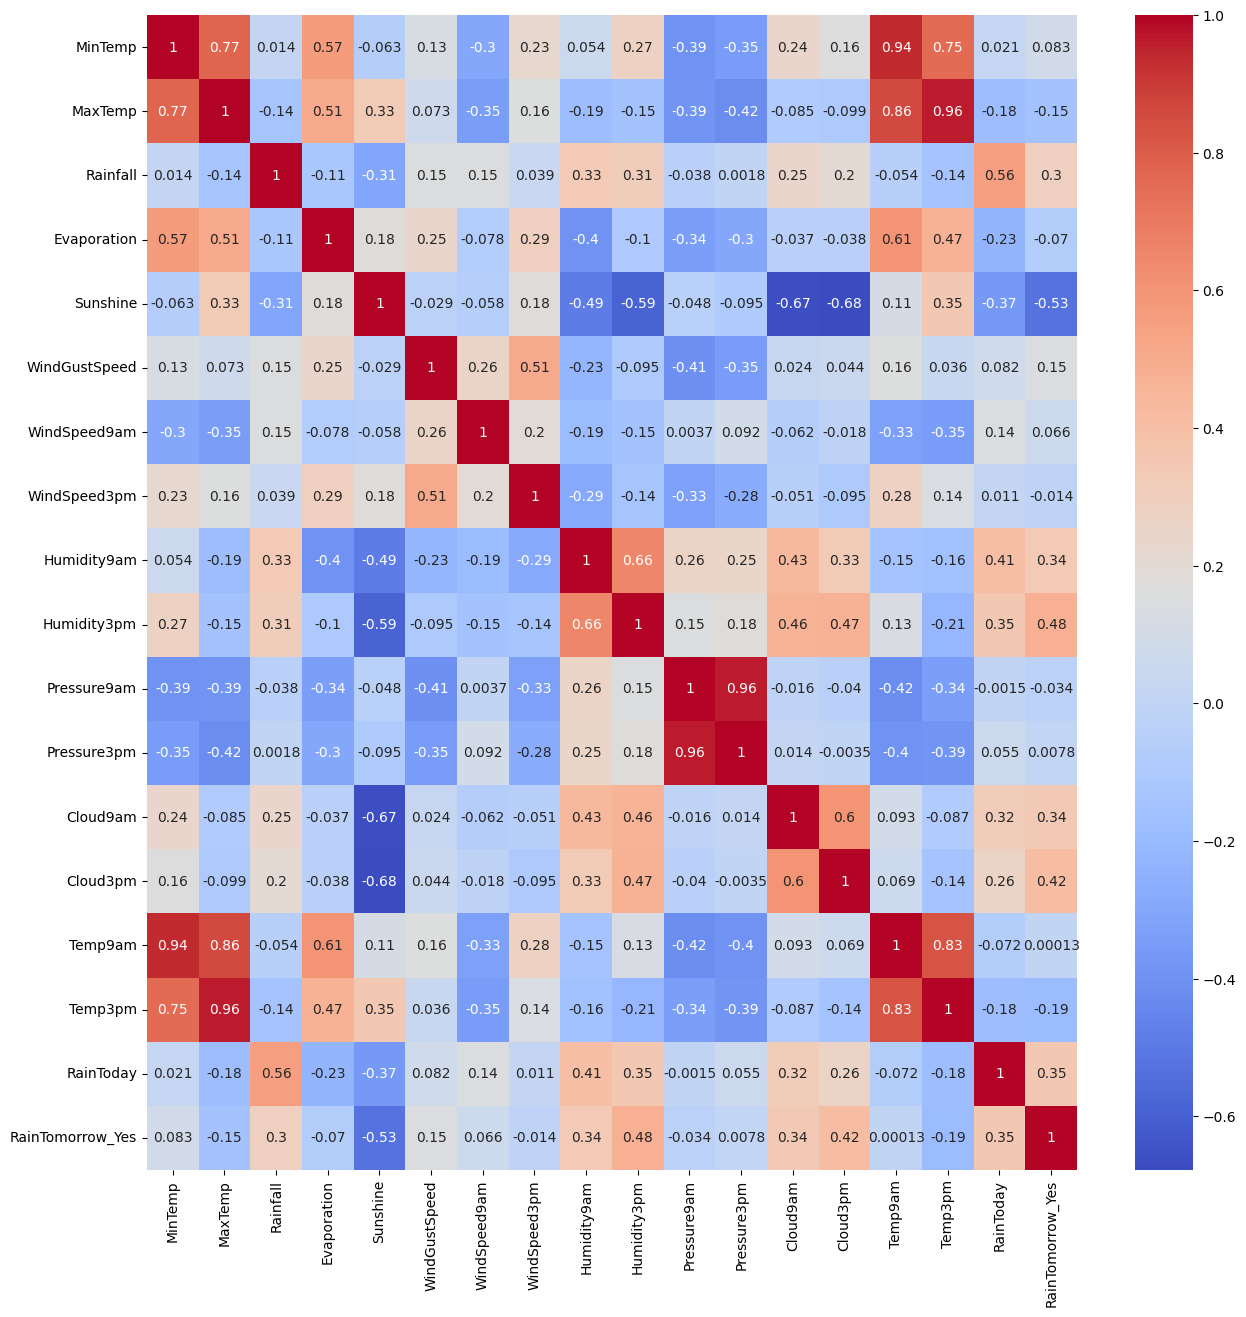

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

Preprocessing

In [ ]:
potential_categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [ ]:
categorical_cols = [col for col in potential_categorical_cols if col in df.columns]

In [ ]:
target_column = 'RainTomorrow_Yes'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Data Preprocessing


In [ ]:
df.replace(['No', 'Yes'], [0,1], inplace=True)
df['RainTomorrow_Yes']

,RainTomorrow_Yes
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [ ]:
print(df.isnull().sum())

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow_Yes    0
dtype: int64


In [ ]:
X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
predictions = KNN.predict(X_test)

In [ ]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
KNN_Confusion_Matrix = confusion_matrix(y_test, predictions)
KNN_Recall_Score = recall_score(y_test, predictions)
KNN_Precision_Score = precision_score(y_test, predictions)
print('KNN Accuracy Score: ', KNN_Accuracy_Score)
print('KNN Jaccard Index: ', KNN_JaccardIndex)
print('KNN F1 Score: ', KNN_F1_Score)
print('KNN Confusion Matrix: ', KNN_Confusion_Matrix)
print('KNN Recall Score: ', KNN_Recall_Score)
print('KNN Precision Score: ', KNN_Precision_Score)

KNN Accuracy Score:  0.7923664122137405
KNN Jaccard Index:  0.7663230240549829
KNN F1 Score:  0.772062589647838
KNN Confusion Matrix:  [[446  30]
 [106  73]]
KNN Recall Score:  0.40782122905027934
KNN Precision Score:  0.7087378640776699


#Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions =  RF.predict(X_test)

In [ ]:
RF_accuracy = accuracy_score(y_test, predictions)
RF_jaccard = jaccard_score(y_test, predictions)
RF_f1 = f1_score(y_test, predictions, average='weighted')
RF_conf_matrix = confusion_matrix(y_test, predictions)
RF_recall = recall_score(y_test, predictions)
RF_precision = precision_score(y_test, predictions)
print('RF Accuracy Score: ', RF_accuracy)
print('RF Jaccard Index: ', RF_jaccard)
print('RF F1 Score: ', RF_f1)
print('RF Confusion Matrix: ', RF_conf_matrix)
print('RF Recall Score: ', RF_recall)
print('RF Precision Score: ', RF_precision)

RF Accuracy Score:  0.8198473282442749
RF Jaccard Index:  0.42995169082125606
RF F1 Score:  0.8064876136808022
RF Confusion Matrix:  [[448  28]
 [ 90  89]]
RF Recall Score:  0.4972067039106145
RF Precision Score:  0.7606837606837606


### SVM


In [ ]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = SVM.predict(X_test)


In [ ]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions)
SVM_Confusion_Matrix = confusion_matrix(y_test, predictions)
SVM_Recall_Score = recall_score(y_test, predictions)
SVM_Precision_Score = precision_score(y_test, predictions)
print('SVM Accuracy Score: ', SVM_Accuracy_Score)
print('SVM Jaccard Index: ', SVM_JaccardIndex)
print('SVM F1 Score: ', SVM_F1_Score)
print('SVM Confusion Matrix: ', SVM_Confusion_Matrix)
print('SVM Recall Score: ', SVM_Recall_Score)
print('SVM Precision Score: ', SVM_Precision_Score)

SVM Accuracy Score:  0.8198473282442749
SVM Jaccard Index:  0.7873873873873873
SVM F1 Score:  0.6289308176100628
SVM Confusion Matrix:  [[437  39]
 [ 79 100]]
SVM Recall Score:  0.5586592178770949
SVM Precision Score:  0.7194244604316546


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [ ]:
gb_accuracy = accuracy_score(y_test, predictions)
gb_jaccard = jaccard_score(y_test, predictions)
gb_f1 = f1_score(y_test, predictions, average='weighted')
gb_conf_matrix = confusion_matrix(y_test, predictions)
gb_recall = recall_score(y_test, predictions)
gb_precision = precision_score(y_test, predictions)
print("GB Accuracy Score:", gb_accuracy)
print("GB Jaccard Score:", gb_jaccard)
print("GB F1 Score:", gb_f1)
print("GB Confusion Matrix:\n", gb_conf_matrix)
print("GB Recall:", gb_recall)
print("GB Precision:", gb_precision)

GB Accuracy Score: 0.8198473282442749
GB Jaccard Score: 0.45871559633027525
GB F1 Score: 0.812149081847734
GB Confusion Matrix:
 [[437  39]
 [ 79 100]]
GB Recall: 0.5586592178770949
GB Precision: 0.7194244604316546


## Report


#### Showing the Accuracy,Jaccard Index, F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [ ]:
Report = {
    'Classification Algorithm': ['KNN, K=4', 'Random Forest', 'SVM', 'GB'],
    'Accuracy Score': [KNN_Accuracy_Score, RF_accuracy, SVM_Accuracy_Score, gb_accuracy],
    'Jaccard Score': [KNN_JaccardIndex, RF_jaccard, SVM_JaccardIndex, gb_jaccard],
    'F1 Score': [KNN_F1_Score, RF_f1, SVM_F1_Score, gb_f1],
    'Confusion Matrix': [KNN_Confusion_Matrix,RF_conf_matrix ,SVM_Confusion_Matrix, gb_conf_matrix], # Assuming you have variables named like this
    'Recall': [KNN_Recall_Score,RF_recall,SVM_Recall_Score, gb_recall],
    'Precision': [KNN_Precision_Score, RF_precision,SVM_Precision_Score, gb_precision]
}

Report_df = pd.DataFrame(Report)

print(Report_df)

  Classification Algorithm  Accuracy Score  Jaccard Score  F1 Score  \
0                 KNN, K=4        0.792366       0.766323  0.772063   
1            Random Forest        0.819847       0.429952  0.806488   
2                      SVM        0.819847       0.787387  0.628931   
3                       GB        0.819847       0.458716  0.812149   

         Confusion Matrix    Recall  Precision  
0  [[446, 30], [106, 73]]  0.407821   0.708738  
1   [[448, 28], [90, 89]]  0.497207   0.760684  
2  [[437, 39], [79, 100]]  0.558659   0.719424  
3  [[437, 39], [79, 100]]  0.558659   0.719424  


In [ ]:
import plotly.express as px

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Jaccard Score'], name='Jaccard Score'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1 Score'], name='F1 Score'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Recall'], name='Recall'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Precision'], name='Precision'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Confusion Matrix'], name='Confusion Matrix'), row=1,col=1
)

fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()
